## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], 
              use_BN=True, BN_before_act=True, BN_after_input=True):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    if BN_after_input:
        x = keras.layers.BatchNormalization()(x)
    for i, n_units in enumerate(num_neurons):
        if use_BN:
            x = keras.layers.Dense(units=n_units, name="hidden_layer"+str(i+1))(x)
            if BN_before_act:
                x = keras.layers.BatchNormalization()(x)
                x = keras.layers.Activation('relu')(x)
            else:
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
def plot_results(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

Experiment with BATCH_SIZE = 2
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_______________________________________

50000/50000 [==============================] - 170s 3ms/step - loss: 2.2356 - acc: 0.1638 - val_loss: 2.5245 - val_acc: 0.2164
Epoch 43/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2390 - acc: 0.1613 - val_loss: 2.4262 - val_acc: 0.1742
Epoch 44/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2385 - acc: 0.1656 - val_loss: 2.4023 - val_acc: 0.2147
Epoch 45/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2447 - acc: 0.1605 - val_loss: 2.4982 - val_acc: 0.1845
Epoch 46/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2366 - acc: 0.1636 - val_loss: 2.7173 - val_acc: 0.2057
Epoch 47/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2432 - acc: 0.1657 - val_loss: 2.6748 - val_acc: 0.1971
Epoch 48/50
50000/50000 [==============================] - 170s 3ms/step - loss: 2.2524 - acc: 0.1645 - val_loss: 2.7834 - val_acc: 0.1970
Epoch 49/50
50000/50000 [==============

50000/50000 [==============================] - 24s 487us/step - loss: 1.1689 - acc: 0.5885 - val_loss: 1.3812 - val_acc: 0.5153
Epoch 38/50
50000/50000 [==============================] - 24s 488us/step - loss: 1.1635 - acc: 0.5863 - val_loss: 1.3480 - val_acc: 0.5247
Epoch 39/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.1574 - acc: 0.5897 - val_loss: 1.3215 - val_acc: 0.5411
Epoch 40/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.1524 - acc: 0.5912 - val_loss: 1.3819 - val_acc: 0.5214
Epoch 41/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.1417 - acc: 0.5949 - val_loss: 1.3748 - val_acc: 0.5207
Epoch 42/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.1392 - acc: 0.5967 - val_loss: 1.3406 - val_acc: 0.5321
Epoch 43/50
50000/50000 [==============================] - 24s 488us/step - loss: 1.1432 - acc: 0.5957 - val_loss: 1.3398 - val_acc: 0.5309
Epoch 44/50
50000/50000 [=======

50000/50000 [==============================] - 14s 279us/step - loss: 0.9523 - acc: 0.6604 - val_loss: 1.4561 - val_acc: 0.5111
Epoch 33/50
50000/50000 [==============================] - 14s 279us/step - loss: 0.9331 - acc: 0.6673 - val_loss: 1.4686 - val_acc: 0.5085
Epoch 34/50
50000/50000 [==============================] - 14s 279us/step - loss: 0.9220 - acc: 0.6723 - val_loss: 1.4553 - val_acc: 0.5170
Epoch 35/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.9190 - acc: 0.6736 - val_loss: 1.4406 - val_acc: 0.5139
Epoch 36/50
50000/50000 [==============================] - 14s 281us/step - loss: 0.9123 - acc: 0.6755 - val_loss: 1.4945 - val_acc: 0.5076
Epoch 37/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.9029 - acc: 0.6766 - val_loss: 1.4501 - val_acc: 0.5215
Epoch 38/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.8958 - acc: 0.6829 - val_loss: 1.4845 - val_acc: 0.5133
Epoch 39/50
50000/50000 [=======

50000/50000 [==============================] - 6s 116us/step - loss: 0.5828 - acc: 0.7966 - val_loss: 1.9151 - val_acc: 0.4452
Epoch 28/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5690 - acc: 0.8017 - val_loss: 1.9451 - val_acc: 0.4656
Epoch 29/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5537 - acc: 0.8060 - val_loss: 1.8624 - val_acc: 0.4654
Epoch 30/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5342 - acc: 0.8161 - val_loss: 2.1648 - val_acc: 0.4397
Epoch 31/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5195 - acc: 0.8163 - val_loss: 2.0568 - val_acc: 0.4641
Epoch 32/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5078 - acc: 0.8219 - val_loss: 2.0022 - val_acc: 0.4654
Epoch 33/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.4841 - acc: 0.8328 - val_loss: 2.0327 - val_acc: 0.4710
Epoch 34/50
50000/50000 [==============

Epoch 23/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.6609 - acc: 0.7774 - val_loss: 1.6710 - val_acc: 0.4785
Epoch 24/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.6373 - acc: 0.7863 - val_loss: 1.7839 - val_acc: 0.4744
Epoch 25/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.6088 - acc: 0.7959 - val_loss: 1.8371 - val_acc: 0.4620
Epoch 26/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.5771 - acc: 0.8103 - val_loss: 1.7905 - val_acc: 0.4820
Epoch 27/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.5544 - acc: 0.8160 - val_loss: 1.8113 - val_acc: 0.4726
Epoch 28/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.5249 - acc: 0.8266 - val_loss: 1.8612 - val_acc: 0.4667
Epoch 29/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.5062 - acc: 0.8337 - val_loss: 1.8169 - val_acc: 0.4730
Epoch 30/50
50000/50000 [=========

Epoch 19/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.0811 - acc: 0.6300 - val_loss: 1.4500 - val_acc: 0.4900
Epoch 20/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.0601 - acc: 0.6373 - val_loss: 1.4490 - val_acc: 0.4885
Epoch 21/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.0378 - acc: 0.6463 - val_loss: 1.4452 - val_acc: 0.4894
Epoch 22/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.0164 - acc: 0.6541 - val_loss: 1.4398 - val_acc: 0.4955
Epoch 23/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9965 - acc: 0.6623 - val_loss: 1.4475 - val_acc: 0.4942
Epoch 24/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.9745 - acc: 0.6712 - val_loss: 1.4562 - val_acc: 0.4928
Epoch 25/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.9541 - acc: 0.6789 - val_loss: 1.4517 - val_acc: 0.4957
Epoch 26/50
50000/50000 [=========

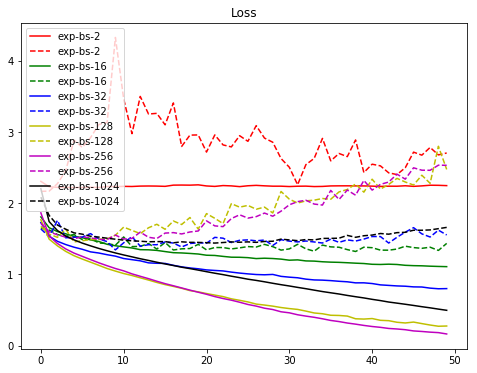

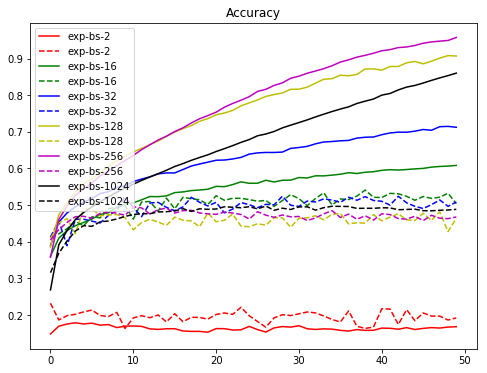

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256, 1024]
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % bs)
    model = build_mlp(input_shape=x_train.shape[1:], use_BN=True, BN_before_act=False, BN_after_input=False)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-bs-%d" % bs
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
plot_results(results)

Experiment with BN_before_act = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256

Epoch 47/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.5945 - acc: 0.8329 - val_loss: 1.5162 - val_acc: 0.4994
Epoch 48/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.5765 - acc: 0.8402 - val_loss: 1.5182 - val_acc: 0.5031
Epoch 49/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.5582 - acc: 0.8468 - val_loss: 1.5165 - val_acc: 0.4997
Epoch 50/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.5405 - acc: 0.8537 - val_loss: 1.5372 - val_acc: 0.4929
Experiment with BN_before_act = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (

Epoch 43/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.6028 - acc: 0.8186 - val_loss: 1.6058 - val_acc: 0.4927
Epoch 44/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5842 - acc: 0.8256 - val_loss: 1.6241 - val_acc: 0.4869
Epoch 45/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5671 - acc: 0.8322 - val_loss: 1.6263 - val_acc: 0.4930
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5496 - acc: 0.8394 - val_loss: 1.6560 - val_acc: 0.4876
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5314 - acc: 0.8469 - val_loss: 1.6817 - val_acc: 0.4867
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5129 - acc: 0.8537 - val_loss: 1.6545 - val_acc: 0.4923
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.4990 - acc: 0.8602 - val_loss: 1.7097 - val_acc: 0.4820
Epoch 50/50
50000/50000 [=========

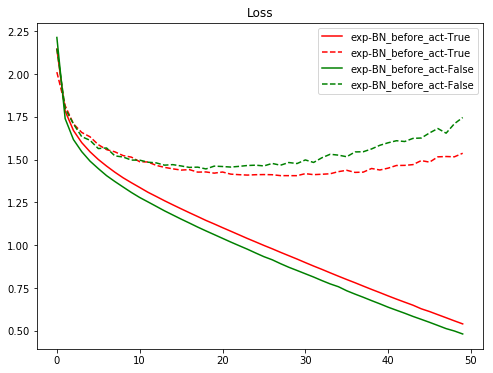

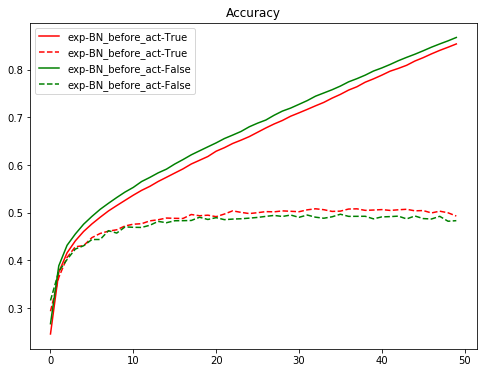

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BN_before_act in [True, False]:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BN_before_act = %s" % str(BN_before_act))
    model = build_mlp(input_shape=x_train.shape[1:], use_BN=True, BN_before_act=BN_before_act, BN_after_input=False)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-BN_before_act-%s" % str(BN_before_act)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
plot_results(results)

Experiment with BN_after_input = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 25

Epoch 46/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3701 - acc: 0.9166 - val_loss: 1.7270 - val_acc: 0.4875
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3508 - acc: 0.9248 - val_loss: 1.7482 - val_acc: 0.4838
Epoch 48/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3349 - acc: 0.9297 - val_loss: 1.7604 - val_acc: 0.4865
Epoch 49/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.3192 - acc: 0.9352 - val_loss: 1.7774 - val_acc: 0.4891
Epoch 50/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3017 - acc: 0.9418 - val_loss: 1.8009 - val_acc: 0.4885
Experiment with BN_after_input = False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_

Epoch 42/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.6417 - acc: 0.8047 - val_loss: 1.5700 - val_acc: 0.4930
Epoch 43/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.6248 - acc: 0.8099 - val_loss: 1.5877 - val_acc: 0.4912
Epoch 44/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.6087 - acc: 0.8167 - val_loss: 1.5819 - val_acc: 0.4936
Epoch 45/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5893 - acc: 0.8262 - val_loss: 1.6133 - val_acc: 0.4909
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5736 - acc: 0.8309 - val_loss: 1.6174 - val_acc: 0.4881
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5550 - acc: 0.8380 - val_loss: 1.6340 - val_acc: 0.4900
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.5404 - acc: 0.8424 - val_loss: 1.6241 - val_acc: 0.4874
Epoch 49/50
50000/50000 [=========

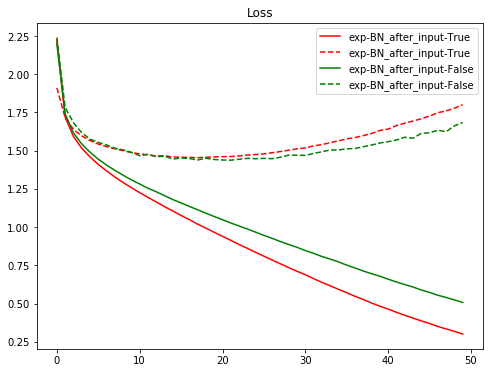

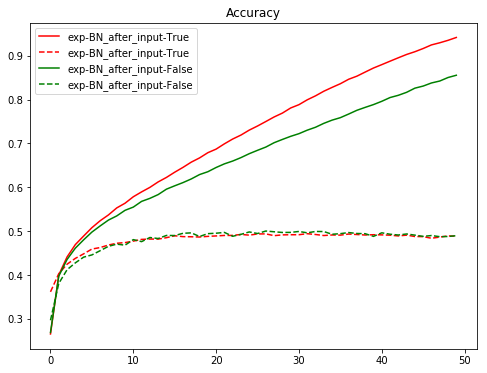

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BN_after_input in [True, False]:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BN_after_input = %s" % str(BN_after_input))
    model = build_mlp(input_shape=x_train.shape[1:], use_BN=True, BN_before_act=False, BN_after_input=BN_after_input)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-BN_after_input-%s" % str(BN_after_input)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
plot_results(results)